# Pytorch dla Debili - bazowane na Blitz Tutorial

https://pytorch.org/tutorials/beginner/deep_learning_60min_blitz.html

## Setup

In [1]:
#tu se wymusiłem szybszy autosave na wszelki
%autosave 60

Autosaving every 60 seconds


In [16]:
#wymagane pakiety
import sys
!{sys.executable} -m pip install --upgrade pip
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install torch torchvision torchaudio

     |████████████████████████████████| 8.5 MB 2.4 MB/s eta 0:00:01
  Using cached kiwisolver-1.3.1-cp39-cp39-macosx_10_9_x86_64.whl (61 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)


In [3]:
#wszystko co potrzebne
import torch
import numpy as np

#pakiety gotowych modeli i danych
import torchvision
import torchaudio

/usr/local/Cellar/jupyterlab/3.0.6/libexec/lib/python3.9/site-packages/torchaudio/backend/utils.py:53: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  warnings.warn(


## Tensor - struktura danych

Tensor to najbardziej bazowa struktura danych w ML. Jest niczym innym jak wielowymiarową tablicą (array) o określonym rozmiarze i zawartości.

Jeśli <u>model to sieć neuronowa</u> ---> <u>tensor to neuron</u>.

In [37]:
#tensor to bardziej fikuśna wielowymiarowa tablica
#bazowy element sieci neuronowej


#tworzenie

#tensor z tablicy
data = [[1, 2],[3,4]]
x_data = torch.tensor(data)

#tensor z tablicy numpy
np_array = np.array(data)
x_np = torch.from_numpy(np_array)

#kopiowanie tensorów
x_ones = torch.ones_like(x_data)
print(f"Ones Tensor: \n {x_ones} \n")
x_rand = torch.rand_like(x_data, dtype=torch.float)
print(f"Random Tensor: \n {x_rand} \n")

#przykładowe szablony tensorów
shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"Random Tensor: \n {rand_tensor} \n")
print(f"Ones Tensor: \n {ones_tensor} \n")
print(f"Zeros Tensor: \n {zeros_tensor} \n")

Ones Tensor: 
 tensor([[1, 1],
        [1, 1]]) 

Random Tensor: 
 tensor([[0.7799, 0.7241],
        [0.4697, 0.8077]]) 

Random Tensor: 
 tensor([[0.6716, 0.9250, 0.8937],
        [0.1277, 0.6322, 0.6772]]) 

Ones Tensor: 
 tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros Tensor: 
 tensor([[0., 0., 0.],
        [0., 0., 0.]]) 



In [11]:
#atrybuty tensorów
tensor = torch.rand(3,4)

print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device tensor is store on: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is store on: cpu


In [24]:
#operacje na tensorach

#przerzucenie na urządzenie CUDA
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

#indeksowanie i slice'owanie
tensor = torch.ones(4,4)
tensor[:,1] = 0
print(f"\n {tensor} \n")

#łączenie tensorów
t1 = torch.cat([tensor, tensor, tensor], dim=1)
print(f"\n {t1} \n")

#mnożenie tensorów
print(f"tensor.mul(tensor) \n {tensor.mul(tensor)} \n")
#albo
print(f"tensor * tensor \n {tensor * tensor} \n")

#matrycowe mnożenie tensorów
print(f"tensor.matmul(tensor.T) \n {tensor.matmul(tensor.T)} \n")
#albo
print(f"tensor @ tensor.T \n {tensor @ tensor.T} \n")

#operacje zmieniające
print(tensor, "\n")
tensor.add_(5)
print(tensor)


 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 


 tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]]) 

tensor.mul(tensor) 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor * tensor 
 tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor.matmul(tensor.T) 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor @ tensor.T 
 tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]]) 

tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]]) 

tensor([[6., 5., 6., 6.],
        

In [27]:
#tensory na CPU i array'e NumPy mogą współdzielić miejsce w pamięci
#zmiana jednego zmienia drugi

#tensor to NumPy array
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t.add_(1)
print(f"t: {t}")
print(f"n: {n}")

#NumPy array to tensor
n = np.ones(5)
t = torch.from_numpy(n)
print(f"n: {n}")
print(f"t: {t}")

np.add(n, 1, out=n)
print(f"n: {n}")
print(f"t: {t}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
t: tensor([2., 2., 2., 2., 2.])
n: [2. 2. 2. 2. 2.]
n: [1. 1. 1. 1. 1.]
t: tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
n: [2. 2. 2. 2. 2.]
t: tensor([2., 2., 2., 2., 2.], dtype=torch.float64)


## Autograd - automatyczna dyferencjacja tensorów

Autograd pomaga z trenowaniem modelu ML.

Sieci neuronowe to kolekcje zagnieżdżonych funkcji wykonywanych na podawanych danych. Te funkcje są definiowane przez parametry (weight oraz bias), które przechowywane są w tensorach.


Trenowanie sieci to dwa proste kroki:

<b>Forward pass</b> - sieć podejmuje decyzje co do wyniku poprzez przeprowadzenie danych przez każdą z funkcji.

<b>Backward pass</b> - sieć dostosowywuje swoje parametry proporcjonalnie do błędu dokonanego w swojej decyzji poprzez wykonanie poprzednich funkcji wstecz, od końca do początku. Zbiera w ten sposób dane o błędzie względem parametrów funkcji (gradient) i optymalizuje parmetry tymi danymi.

<b>Przykładowy pojedynczy krok</b>

Dla przykładu ładujemy gotowy przetrenowany model z biblioteki <i>torchvision</i>. Tworzymy losowy tensor reprezentujący pojedynczy obraz z 3 kanałami (r,g,b), o wysokości i szerokości 64. Jego <i>label</i> inicjalizujemy jako losowa wartość.

In [4]:
#zaimportowanie gotowego przetrenowanego sample modelu
model = torchvision.models.resnet18(pretrained=True)

#nasz losowy tensor
data = torch.rand(1, 3, 64, 64)

#losowy label
labels = torch.rand(1, 1000)

Następnie przepuszczamy dane przez każdą z warstw tego modelu, by uzyskać predyckję. To jest nasz <b>forward</b> pass.

In [7]:
prediction = model(data)

print(prediction)

tensor([[-7.1515e-01, -4.3022e-01, -7.0091e-01, -1.5809e+00, -5.0087e-01,
         -2.9862e-01, -4.7813e-01,  4.1816e-01,  2.8585e-01, -8.7470e-01,
         -8.9103e-01, -6.5719e-01, -1.0810e-01, -7.5986e-01, -9.9181e-01,
         -5.9462e-01, -5.7904e-01, -8.3910e-03, -1.6481e-01, -2.3170e-01,
         -1.3296e+00, -8.3072e-01, -1.3147e+00,  1.8451e-01, -1.0068e+00,
         -1.1954e+00, -7.7654e-01, -1.0936e+00, -8.3074e-01, -3.3485e-01,
         -9.2618e-01, -9.1370e-01, -5.4308e-01, -8.7086e-01, -5.5538e-01,
         -7.2645e-01,  2.4075e-01, -7.6798e-01, -3.3602e-01, -2.5175e-01,
         -7.6118e-01, -7.7337e-01, -1.1291e+00, -2.1220e-01, -4.7900e-01,
         -2.7036e-01, -9.4719e-01, -4.0640e-01, -1.3562e+00, -1.5504e+00,
         -7.1998e-01,  4.4067e-01, -2.3189e-01, -6.4793e-01,  2.0765e-01,
         -9.1033e-01, -2.1402e-01, -1.1579e+00, -5.3835e-01, -3.1625e-01,
          6.5600e-01,  1.1076e-01, -3.7563e-02,  1.9568e-01, -5.4144e-01,
         -2.6035e-01, -8.4322e-02, -2.

Następnie używamy predykcji naszego modelu i labela do wyliczenia błędu. Wykonujemy <b>backward pass</b> na naszym wyniku. Robimy to poprzez wywołanie `.backward()` na tensorze błędu.

Autograd sam wylicza gradnienty dla każdego parametru modelu i przetrzymuje je w parametrze `.grad` tensora.

In [12]:
#tworzymy tensor błędu
loss = (prediction - labels).sum()

#wykonujemy backward pass
loss.backward()

print(loss)

tensor(-487.9036, grad_fn=<SumBackward0>)


Następnie ładujemy optimizer (dokładniej: SGD - tego nie musicie szczegółowo wiedzieć) z <i>learning rate = 0.01</i> i <i>momentum = 0.9</i>.

Rejestrujemy wszystkie parametry modelu w optimizerze.

In [13]:
optim = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)

Wykonujemy `.step()` by zainicjować gradientację naszego modelu.
To dostraja każdy parametr jego gradientem uzyskanym wcześniej.

In [14]:
optim.step()

## Sieci Neuronowe

Sieci neuronowe tworzy się z użyciem pakietu ```torch.nn```.

```nn``` polega na ```autograd``` by definiować modele i je odróżniać. ```nn.Module``` zawiera warstwy i metodę ```forward(input)``` która zwraca ```output```.

Typowa procedura uczenia sieci:
- Definiowanie sieci z "nauczalnymi" parmetrami (weights),
- Iterowanie po zbiorze danych ```input```,
- Przetwarzanie ```input``` przez sieć,
- Obliczanie błędu (loss),
- Propagacja gradientu przez parametry sieci,
- Aktualizacja parametrów sieci (```weight = weight = learning_rate * gradient```),


### Definiowanie sieci:

In [4]:
#importy
import torch
import torch.nn as nn
import torch.nn.functional as F

#sieć
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        # 1 kanał wejścia (obrazek), 6 kanałów wyjścia, 3x3 kwadratowa konwolucja
        # kernel
        self.conv1 = nn.Conv2d(1, 6, 3)
        self.conv2 = nn.Conv2d(6, 16, 3)
        # po przekształceniu afinicznym: y = Wx + b
        self.fc1 = nn.Linear(16 * 6 * 6, 120)  # 6*6 z wymiarów obrazka
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        # Max pooling z okienka (2, 2)
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2))
        # Jeśli rozmiar jest kwadratem to możemy jedynie wskazać jedną liczbę
        x = F.max_pool2d(F.relu(self.conv2(x)), 2)
        x = x.view(-1, self.num_flat_features(x))
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # wszystkie wymiary poza wymiarem batch'a
        num_features = 1
        for s in size:
            num_features *= s
        return num_features


net = Net()
print(net)

Net(
  (conv1): Conv2d(1, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=576, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


Trzeba zdefiniować jedynie funkcję ```forward```, a ```backward``` zostanie samo zdefiniowane przez ```autograd```. Można użyć dowolnych operacji na Tensorach w ```forward```.

"Nauczalne" parametry modelu są zwracane przez ```net.parameters()```.

In [5]:
params = list(net.parameters())
print(len(params))
print(params[0].size())  # conv1's .weight

10
torch.Size([6, 1, 3, 3])


Spróbujmy losowe obrazki wsadowe 32x32, bo takie przyjmuje nasza sieć.

In [6]:
input = torch.randn(1, 1, 32, 32)
out = net(input)
print(out)

tensor([[-0.0260,  0.0693,  0.1523, -0.1066, -0.1105, -0.0464, -0.0802, -0.1641,
          0.0109, -0.0011]], grad_fn=<AddmmBackward>)


Zerujemy buffery gradientu wszystkich parametrów losowymi gradientami.

In [7]:
net.zero_grad()
out.backward(torch.rand(1,10))

### Funkcja Błędu (Loss)

Funkcja błędu przyjmuje parę (output, target) jako parametry i oblicza pojedynczą wartość, która jest przybliżeniem jak daleko output różni się od target.

W pakiecie ```nn``` znajduje się kilka funkcji błędu. Najprostszą jest ```nn.MSELoss```, która oblicza błżd średniokwadratowy pomiędzy outputem a targetem.

Np:

In [8]:
output = net(input)
target = torch.randn(10)  # przykładowy target
target = target.view(1, -1)  # przekształcenie target na ten sam kształt co output
criterion = nn.MSELoss()

loss = criterion(output, target)
print(loss)

tensor(0.4805, grad_fn=<MseLossBackward>)


Śledząc ```loss``` we wstecznym kierunku używając jego atrybutu ```.grad_fn``` zobaczymy graf obliczeń wyglądający tak:

```input -> conv2d -> relu -> maxpool2d -> conv2d -> relu -> maxpool2d
      -> view -> linear -> relu -> linear -> relu -> linear
      -> MSELoss
      -> loss```

Gdy wywołamy ```loss.backward()``` cały graf zostaje odróżniony, a Tensory w grafie z ```requires_grad=True``` będą miały ich Tensor ```.grad``` zakumulowany z gradientem.

Dla ilustracji:

In [9]:
print(loss.grad_fn)  # MSELoss
print(loss.grad_fn.next_functions[0][0])  # Linear
print(loss.grad_fn.next_functions[0][0].next_functions[0][0])  # ReLU

### Backdrop

Do backpropagowania błędu używamy jedynie ```loss.backward()```, lecz musimy wyczyścić obecne gradienty, by się nie akumulowały.

In [10]:
#zerujemy gradient
net.zero_grad()

print('conv1.bias.grad before backward')
print(net.conv1.bias.grad)

#backward
loss.backward()

print('conv1.bias.grad after bakcward')
print(net.conv1.bias.grad)

conv1.bias.grad before backward
tensor([0., 0., 0., 0., 0., 0.])
conv1.bias.grad after bakcward
tensor([ 0.0026,  0.0102, -0.0057,  0.0024,  0.0099,  0.0027])


### Aktualizowanie weights

Najprostsza zasada to Stochastic Gradient Descent (SGD):

```weight = weight - learning_rate * gradient```

Implementacja:

In [11]:
learning_rate = 0.01
for f in net.parameters():
    f.data.sub_(f.grad.data * learning_rate)

Wraz z użytkowaniem sieci neuronowych będziemy chcieli używać innych zasad aktualizowania (SGD, Nesterov-SGD, Adam, RMSProp, etc.). Do tego służy pakiet ```torch.optim```, który implementuje te metody.

W praktyce:

In [12]:
import torch.optim as optim

# tworzymy optimizer
optimizer = optim.SGD(net.parameters(), lr=0.01)

# in your training loop:
optimizer.zero_grad()   # zerujemy buffery gradientu
output = net(input)
loss = criterion(output, target)
loss.backward()
optimizer.step()    # Wykonuje aktualizowanie

## Trenowanie klasyfikatora

Bawiąc się z tekstem, obrazami, audio lub video można używać standardowych paczek pythona i łądować je do tablicy NumPy, a ją konwertować w ```torch.*Tensor```.

- Dla obrazków: Pillow, OpenCV
- Dla audio: scipy, librosa
- Dla tekstu: raw Python lub Cython based loading, albo NLTK, SpaCy

Dla wizji istnieje ```torchvision```. Zawiera popularne zestawy danych: Imagenet, CIFAR10, MNIST, etc. oraz transormatory danych dla obrazów, viz., ```torchvision.datasets``` and ```torch.utils.data.DataLoader```.


Teraz użyjemy zestawu CIFAR10. Posiada klasy: ‘airplane’, ‘automobile’, ‘bird’, ‘cat’, ‘deer’, ‘dog’, ‘frog’, ‘horse’, ‘ship’, ‘truck’. Obrazki w CIFAR-10 są typu 3x32x32, czyli 3-kanałowy kolor, 32x32 piksele.

### Trenowanie klasyfikatora obrazków

Wykonamy:
- Załadowanie i normalizację CIFAR10 poprzez ```torchvision```
- Definicję konwolucyjnej sieci neuronowej
- Definincje funkcji błędu
- Trenowanie sieci danymi z zestawu
- Testowanie sieci zestawem testowym

#### Ładowanie i normalizacja CIFAR10

In [13]:
import torch
import torchvision
import torchvision.transforms as transforms

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

100.0%

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


Tak wyglądają btw:

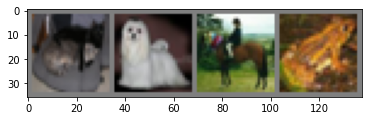

  cat   dog horse  frog


In [17]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

#### Definiujemy Konwolucyjną Sieć

In [18]:
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

#### Definiujemy funkcję błędu i optimizer

In [19]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#### Trenujemy naszą sieć

In [20]:
for epoch in range(2):  # loopowanie bo zestawie danych 2 razy

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # zbiera inpputy; data to lista [inputs, labels]
        inputs, labels = data

        # zerujemy gradienty parametrów
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # printujemy statystyki
        running_loss += loss.item()
        if i % 2000 == 1999:    # printuje co 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Trening zakończony')

[1,  2000] loss: 2.208
[1,  4000] loss: 1.886
[1,  6000] loss: 1.720
[1,  8000] loss: 1.617
[1, 10000] loss: 1.529
[1, 12000] loss: 1.500
[2,  2000] loss: 1.437
[2,  4000] loss: 1.387
[2,  6000] loss: 1.355
[2,  8000] loss: 1.350
[2, 10000] loss: 1.338
[2, 12000] loss: 1.291
Trening zakończony


##### Zapisujemy szybko nasz model na wszelki wypadek

In [21]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

#### Testujemy model na danych testowych

Przepuściliśmy sieć dwa razy po danych treningowych i wypada sprawdzić, czy czegokolwiek się nauczyła.

Robimy to poprzez przewidywanie labela klasy który wypluwa sieć i sprawdzaniu go względem danych. Jeśli się zgadza, to dodajemy próbkę do poprawnych predykcji.

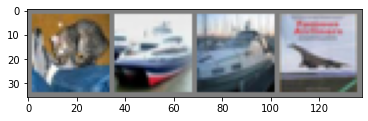

Prawdziwa klasa:    cat  ship  ship plane
Przewidziane:    cat   car   car  ship


In [23]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# printuje nam dane obrazka dla naszej wiedzy
imshow(torchvision.utils.make_grid(images))
print('Prawdziwa klasa: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

#wczytujemy zapisany model
net = Net()
net.load_state_dict(torch.load(PATH))

#sprawdzamy co sieć myśli o obrazkach testowych
outputs = net(images)

#output to energie dla 10 klas
#im bardziej sieć jest pewna że to dana klasa, tym wyższa energia
#zbieramy indeks najwyższej energii
_, predicted = torch.max(outputs, 1)

print('Przewidziane: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Wyniki całkiem całkiem. teraz zaobaczmy co dla całego datasetu:

In [24]:
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Dokładność sieci dla 10000 testowych obrazków: %d %%' % (
    100 * correct / total))

Dokładność sieci dla 10000 testowych obrazków: 53 %


O wiele lepiej niż strzelanie (wynik byłby na poziomie 10%).

Tak wygląda celność rozłożona dla klas:

In [25]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of plane : 51 %
Accuracy of   car : 54 %
Accuracy of  bird : 48 %
Accuracy of   cat : 45 %
Accuracy of  deer : 41 %
Accuracy of   dog : 24 %
Accuracy of  frog : 53 %
Accuracy of horse : 60 %
Accuracy of  ship : 83 %
Accuracy of truck : 66 %


Teraz możemy wrócić do modelowania sieci(zmienić szerokość sieci w ```nn.conv2d```) oraz trenowania i zwiększyć liczbę pętli po naszych danych i zobaczyć zmianę w wynikach.

[1,  2000] loss: 2.152
[1,  4000] loss: 1.787
[1,  6000] loss: 1.634
[1,  8000] loss: 1.547
[1, 10000] loss: 1.483
[1, 12000] loss: 1.434
[2,  2000] loss: 1.361
[2,  4000] loss: 1.337
[2,  6000] loss: 1.321
[2,  8000] loss: 1.279
[2, 10000] loss: 1.241
[2, 12000] loss: 1.260
[3,  2000] loss: 1.177
[3,  4000] loss: 1.144
[3,  6000] loss: 1.127
[3,  8000] loss: 1.123
[3, 10000] loss: 1.129
[3, 12000] loss: 1.114
[4,  2000] loss: 1.034
[4,  4000] loss: 1.035
[4,  6000] loss: 1.055
[4,  8000] loss: 1.032
[4, 10000] loss: 1.002
[4, 12000] loss: 1.030
[5,  2000] loss: 0.942
[5,  4000] loss: 0.941
[5,  6000] loss: 0.944
[5,  8000] loss: 0.982
[5, 10000] loss: 0.956
[5, 12000] loss: 1.002
Trening zakończony


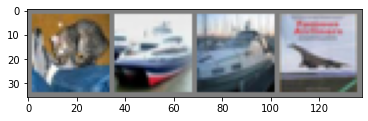

Prawdziwa klasa:    cat  ship  ship plane
Przewidziane:    cat  ship  ship plane
Dokładność sieci dla 10000 testowych obrazków: 63 %
Accuracy of plane : 63 %
Accuracy of   car : 80 %
Accuracy of  bird : 49 %
Accuracy of   cat : 51 %
Accuracy of  deer : 45 %
Accuracy of   dog : 41 %
Accuracy of  frog : 81 %
Accuracy of horse : 76 %
Accuracy of  ship : 83 %
Accuracy of truck : 67 %


In [27]:
import torch.nn.functional as F

#sieć
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 12, 5) #drugi argument podwojony
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(12, 16, 5) #pierwszy argument musi być taki jak drugi argument pierwszego nn.conv2d
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

#optimizer
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

#trenujemy
for epoch in range(5):  # loopowanie bo zestawie danych 5 razy

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # zbiera inpputy; data to lista [inputs, labels]
        inputs, labels = data

        # zerujemy gradienty parametrów
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # printujemy statystyki
        running_loss += loss.item()
        if i % 2000 == 1999:    # printuje co 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Trening zakończony')

#zapis modelu
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

#testowe 4 obrazki
dataiter = iter(testloader)
images, labels = dataiter.next()

# printuje nam dane obrazka dla naszej wiedzy
imshow(torchvision.utils.make_grid(images))
print('Prawdziwa klasa: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

#wczytujemy zapisany model
net = Net()
net.load_state_dict(torch.load(PATH))

#sprawdzamy co sieć myśli o obrazkach testowych
outputs = net(images)

#output to energie dla 10 klas
#im bardziej sieć jest pewna że to dana klasa, tym wyższa energia
#zbieramy indeks najwyższej energii
_, predicted = torch.max(outputs, 1)

print('Przewidziane: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

#dla całego datasetu
correct = 0
total = 0
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Dokładność sieci dla 10000 testowych obrazków: %d %%' % (
    100 * correct / total))

#rozkład dla klas
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Jak na moje to jackpot. Pamiętajcie że samo zwiększanie pętli po tym samym secie danych dużo nie da. Najlepiej poszerzać sieć i zwiększać dataset treningowy

## Tu dla tych co mają Nvidie

### Trenowanie na GPU

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Jeśli jesteśmy na maszynie z GPU z Cuda to tu go wyprintuje
print(device)

In [ ]:
#przerzucamy sieć na GPU
net.to(device)

#inputy też trzeba przez GPU przerzucać na każdym kroku
inputs, labels = data[0].to(device), data[1].to(device)

## To na tyle z tego tutoriala. Wiemy jak zrobić sieć klasyfikującą obrazki. Z tego kodu da się rozgrzebać to co CJ wymyśli chyba. Chyba...